# **Customer Service Requests Analysis**        
##### Project by:Syed Sabeel


DESCRIPTION

Background of Problem Statement :

NYC 311's mission is to provide the public with quick and easy access to all New York City government services and information while offering the best customer service. Each day, NYC311 receives thousands of requests related to several hundred types of non-emergency services, including noise complaints, plumbing issues, and illegally parked cars. These requests are received by NYC311 and forwarded to the relevant agencies such as the police, buildings, or transportation. The agency responds to the request, addresses it, and then closes it.

Problem Objective :

Perform a service request data analysis of New York City 311 calls. You will focus on the data wrangling techniques to understand the pattern in the data and also visualize the major complaint types.
Domain: Customer Service

Analysis Tasks to be performed:

(Perform a service request data analysis of New York City 311 calls) 

Import a 311 NYC service request.
Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing. (Hint: Explore the package/module datetime)
Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.
Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.
Perform a statistical test for the following:
Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject the Null Hypothesis along with the corresponding ‘p-value’.

Whether the average response time across complaint types is similar or not (overall)
Are the type of complaint or service requested and location related?
Dataset Description :

Field	Description
Unique Key	(Plain text) - Unique identifier for the complaints
Created Date	(Date and Time) - The date and time on which the complaint is raised
Closed Date	(Date and Time)  - The date and time on which the complaint is closed
Agency	(Plain text) - Agency code
Agency Name	(Plain text) - Name of the agency
Complaint Type	(Plain text) - Type of the complaint
Descriptor	(Plain text) - Complaint type label (Heating - Heat, Traffic Signal Condition - Controller)
Location Type	(Plain text) - Type of the location (Residential, Restaurant, Bakery, etc)
Incident Zip	(Plain text) - Zip code for the location
Incident Address	(Plain text) - Address of the location
Street Name	(Plain text) - Name of the street
Cross Street 1	(Plain text) - Detail of cross street
Cross Street 2	(Plain text) - Detail of another cross street
Intersection Street 1	(Plain text) - Detail of intersection street if any
Intersection Street 2	(Plain text) - Detail of another intersection street if any
Address Type	(Plain text) - Categorical (Address or Intersection)
City	(Plain text) - City for the location
Landmark	(Plain text) - Empty field
Facility Type	(Plain text) - N/A
Status	(Plain text) - Categorical (Closed or Pending)
Due Date	(Date and Time) - Date and time for the pending complaints
Resolution Action Updated Date	(Date and Time) - Date and time when the resolution was provided
Community Board	(Plain text) - Categorical field (specifies the community board with its code)
Borough	(Plain text) - Categorical field (specifies the community board)
X Coordinate	(State Plane) (Number)
Y Coordinate	(State Plane) (Number)
Park Facility Name	(Plain text) - Unspecified
Park Borough	(Plain text) - Categorical (Unspecified, Queens, Brooklyn etc)
School Name	(Plain text) - Unspecified
School Number	(Plain text)  - Unspecified
School Region	(Plain text)  - Unspecified
School Code	(Plain text)  - Unspecified
School Phone Number	(Plain text)  - Unspecified
School Address	(Plain text)  - Unspecified
School City	(Plain text)  - Unspecified
School State	(Plain text)  - Unspecified
School Zip	(Plain text)  - Unspecified
School Not Found	(Plain text)  - Empty Field
School or Citywide Complaint	(Plain text)  - Empty Field
Vehicle Type	(Plain text)  - Empty Field
Taxi Company Borough	(Plain text)  - Empty Field
Taxi Pick Up Location	(Plain text)  - Empty Field
Bridge Highway Name	(Plain text)  - Empty Field
Bridge Highway Direction	(Plain text)  - Empty Field
Road Ramp	(Plain text)  - Empty Field
Bridge Highway Segment	(Plain text)  - Empty Field
Garage Lot Name	(Plain text)  - Empty Field
 
Ferry Direction	(Plain text)  - Empty Field
Ferry Terminal Name	(Plain text)  - Empty Field
Latitude	(Number) - Latitude of the location
Longitude	(Number) - Longitude of the location
Location	(Location) - Coordinates (Latitude, Longitude)

In [1]:
import pandas as pd # pandas is a python package to manipulate data, data operation, data handling, data wrangling
import numpy as np  # numpy is a math library to perform numerical operation using pre-defined function
import matplotlib.pyplot as plt #matplotlib is a library for graphic or data visualization
import seaborn as sns #Seaborn is a library for making statistical graphics in Python
import warnings # to hide the warning message if any
warnings.filterwarnings("ignore")

In [2]:
### 1. Import a 311 NYC service request

In [3]:
#To read or fetch the data from csv file to dataframe named 'df_311' import csv file.
df_311=pd.read_csv('311_Service_Requests_from_2010_to_Present.csv')

In [4]:
#shape function outputs number of rows and columns in dataframe(rows=300698 and columns=53)
df_311.shape

(300698, 53)

In [5]:
#head & tail function results in displaying first & last 5 rows of dataframe respectively
df_311.head()

,Unique Key,Created Date,Closed Date,Agency,Agency Name,Complaint Type,Descriptor,Location Type,Incident Zip,Incident Address,...,Bridge Highway Name,Bridge Highway Direction,Road Ramp,Bridge Highway Segment,Garage Lot Name,Ferry Direction,Ferry Terminal Name,Latitude,Longitude,Location
0,32310363,12/31/2015 11:59:45 PM,01-01-16 0:55,NYPD,New York City Police Department,Noise - Street/Sidewalk,Loud Music/Party,Street/Sidewalk,10034.0,71 VERMILYEA AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.865682,-73.923501,"(40.86568153633767, -73.92350095571744)"
1,32309934,12/31/2015 11:59:44 PM,01-01-16 1:26,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,11105.0,27-07 23 AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.775945,-73.915094,"(40.775945312321085, -73.91509393898605)"
2,32309159,12/31/2015 11:59:29 PM,01-01-16 4:51,NYPD,New York City Police Department,Blocked Driveway,No Access,Street/Sidewalk,10458.0,2897 VALENTINE AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.870325,-73.888525,"(40.870324522111424, -73.88852464418646)"
3,32305098,12/31/2015 11:57:46 PM,01-01-16 7:43,NYPD,New York City Police Department,Illegal Parking,Commercial Overnight Parking,Street/Sidewalk,10461.0,2940 BAISLEY AVENUE,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.835994,-73.828379,"(40.83599404683083, -73.82837939584206)"
4,32306529,12/31/2015 11:56:58 PM,01-01-16 3:24,NYPD,New York City Police Department,Illegal Parking,Blocked Sidewalk,Street/Sidewalk,11373.0,87-14 57 ROAD,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,40.733060,-73.874170,"(40.733059618956815, -73.87416975810375)"


In [6]:
#info outputs non null count and datatypes of columns in dataframe
df_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 53 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [7]:
# to findout number of null value in the respective column
df_311.isna().sum()

Unique Key                             0
Created Date                           0
Closed Date                         2164
Agency                                 0
Agency Name                            0
Complaint Type                         0
Descriptor                          5914
Location Type                        131
Incident Zip                        2615
Incident Address                   44410
Street Name                        44410
Cross Street 1                     49279
Cross Street 2                     49779
Intersection Street 1             256840
Intersection Street 2             257336
Address Type                        2815
City                                2614
Landmark                          300349
Facility Type                       2171
Status                                 0
Due Date                               3
Resolution Description                 0
Resolution Action Updated Date      2187
Community Board                        0
Borough         

In [8]:
#Data Wrangling
#from info cell we found there are few non null values in columns from 39 to 49, drop function is used to remove these columns.
#axis=1 is for selecting columns, inplace=True for permanent change in dataframe df_311

df_311.drop(df_311.iloc[:,39:50],axis=1,inplace=True)


In [9]:
df_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 42 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   Unique Key                      300698 non-null  int64  
 1   Created Date                    300698 non-null  object 
 2   Closed Date                     298534 non-null  object 
 3   Agency                          300698 non-null  object 
 4   Agency Name                     300698 non-null  object 
 5   Complaint Type                  300698 non-null  object 
 6   Descriptor                      294784 non-null  object 
 7   Location Type                   300567 non-null  object 
 8   Incident Zip                    298083 non-null  float64
 9   Incident Address                256288 non-null  object 
 10  Street Name                     256288 non-null  object 
 11  Cross Street 1                  251419 non-null  object 
 12  Cross Street 2  

In [10]:
df_311.columns

Index(['Unique Key', 'Created Date', 'Closed Date', 'Agency', 'Agency Name',
       'Complaint Type', 'Descriptor', 'Location Type', 'Incident Zip',
       'Incident Address', 'Street Name', 'Cross Street 1', 'Cross Street 2',
       'Intersection Street 1', 'Intersection Street 2', 'Address Type',
       'City', 'Landmark', 'Facility Type', 'Status', 'Due Date',
       'Resolution Description', 'Resolution Action Updated Date',
       'Community Board', 'Borough', 'X Coordinate (State Plane)',
       'Y Coordinate (State Plane)', 'Park Facility Name', 'Park Borough',
       'School Name', 'School Number', 'School Region', 'School Code',
       'School Phone Number', 'School Address', 'School City', 'School State',
       'School Zip', 'School Not Found', 'Latitude', 'Longitude', 'Location'],
      dtype='object')

In [11]:
#By analysis, these columns assigned in variable are not required for insights,hence these can be eliminated
del_col=['Incident Zip','Incident Address','Street Name','Cross Street 1','Cross Street 2','Intersection Street 1',
         'Intersection Street 2','Address Type','Landmark','Resolution Description','Resolution Action Updated Date',
         'Community Board','X Coordinate (State Plane)','Y Coordinate (State Plane)','Park Facility Name','Park Borough',
         'School Name', 'School Number', 'School Region', 'School Code','School Phone Number','School Address', 'School City',
         'School State','School Zip','School Not Found']

In [12]:
#Removing columns mentioned in del_col using drop method
df_311.drop(del_col,axis=1,inplace = True)

In [13]:
df_311.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300698 entries, 0 to 300697
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unique Key      300698 non-null  int64  
 1   Created Date    300698 non-null  object 
 2   Closed Date     298534 non-null  object 
 3   Agency          300698 non-null  object 
 4   Agency Name     300698 non-null  object 
 5   Complaint Type  300698 non-null  object 
 6   Descriptor      294784 non-null  object 
 7   Location Type   300567 non-null  object 
 8   City            298084 non-null  object 
 9   Facility Type   298527 non-null  object 
 10  Status          300698 non-null  object 
 11  Due Date        300695 non-null  object 
 12  Borough         300698 non-null  object 
 13  Latitude        297158 non-null  float64
 14  Longitude       297158 non-null  float64
 15  Location        297158 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 36.7+ 

In [14]:
df_311.isna().sum()

Unique Key           0
Created Date         0
Closed Date       2164
Agency               0
Agency Name          0
Complaint Type       0
Descriptor        5914
Location Type      131
City              2614
Facility Type     2171
Status               0
Due Date             3
Borough              0
Latitude          3540
Longitude         3540
Location          3540
dtype: int64

In [15]:
#New dataframe to retain open case for further insight.
df_311_Open=pd.DataFrame(df_311)

In [16]:
df_311.dropna(subset=['Closed Date','Descriptor','Location Type','City','Facility Type','Latitude','Longitude','Location'],inplace=True)


In [17]:
df_311.isna().sum()

Unique Key        0
Created Date      0
Closed Date       0
Agency            0
Agency Name       0
Complaint Type    0
Descriptor        0
Location Type     0
City              0
Facility Type     0
Status            0
Due Date          0
Borough           0
Latitude          0
Longitude         0
Location          0
dtype: int64

In [18]:
df_311['City']=df_311['City'].str.upper()
df_311['Borough']=df_311['Borough'].str.upper()

In [19]:
df_311.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291105 entries, 0 to 300697
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Unique Key      291105 non-null  int64  
 1   Created Date    291105 non-null  object 
 2   Closed Date     291105 non-null  object 
 3   Agency          291105 non-null  object 
 4   Agency Name     291105 non-null  object 
 5   Complaint Type  291105 non-null  object 
 6   Descriptor      291105 non-null  object 
 7   Location Type   291105 non-null  object 
 8   City            291105 non-null  object 
 9   Facility Type   291105 non-null  object 
 10  Status          291105 non-null  object 
 11  Due Date        291105 non-null  object 
 12  Borough         291105 non-null  object 
 13  Latitude        291105 non-null  float64
 14  Longitude       291105 non-null  float64
 15  Location        291105 non-null  object 
dtypes: float64(2), int64(1), object(13)
memory usage: 37.8+ 

### 2. Read or convert the columns ‘Created Date’ and Closed Date’ to datetime datatype and create a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.

In [20]:
# As seen in df_311.info, Dtype of Created Date and Closed Date is object type and same to be changed to date_time format 
#This can be done using to_datetime function from pandas
df_311['Created Date']=pd.to_datetime(df_311['Created Date'])

In [21]:
df_311['Closed Date']=pd.to_datetime(df_311['Closed Date'])

In [22]:
df_311.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291105 entries, 0 to 300697
Data columns (total 16 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   Unique Key      291105 non-null  int64         
 1   Created Date    291105 non-null  datetime64[ns]
 2   Closed Date     291105 non-null  datetime64[ns]
 3   Agency          291105 non-null  object        
 4   Agency Name     291105 non-null  object        
 5   Complaint Type  291105 non-null  object        
 6   Descriptor      291105 non-null  object        
 7   Location Type   291105 non-null  object        
 8   City            291105 non-null  object        
 9   Facility Type   291105 non-null  object        
 10  Status          291105 non-null  object        
 11  Due Date        291105 non-null  object        
 12  Borough         291105 non-null  object        
 13  Latitude        291105 non-null  float64       
 14  Longitude       291105 non-null  flo

In [23]:
# creating a new column ‘Request_Closing_Time’ as the time elapsed between request creation and request closing.
df_311['Request_Closing_Time']=df_311['Closed Date']-df_311['Created Date']

In [24]:
df_311[['Closed Date','Created Date','Request_Closing_Time']]

,Closed Date,Created Date,Request_Closing_Time
0,2016-01-01 00:55:00,2015-12-31 23:59:45,00:55:15
1,2016-01-01 01:26:00,2015-12-31 23:59:44,01:26:16
2,2016-01-01 04:51:00,2015-12-31 23:59:29,04:51:31
3,2016-01-01 07:43:00,2015-12-31 23:57:46,07:45:14
4,2016-01-01 03:24:00,2015-12-31 23:56:58,03:27:02
...,...,...,...
300692,2015-03-29 01:13:01,2015-03-29 00:34:32,00:38:29
300694,2015-03-29 02:33:59,2015-03-29 00:33:28,02:00:31
300695,2015-03-29 03:40:20,2015-03-29 00:33:03,03:07:17
300696,2015-03-29 04:38:35,2015-03-29 00:33:02,04:05:33


##### Above table shown outputs the time taken to close the complaint once opened.

### 3. Provide major insights/patterns that you can offer in a visual format (graphs or tables); at least 4 major conclusions that you can come up with after generic data mining.

##### a.From the data analysis, Complaint type is important input and different types & counts of complaints received is found below

In [25]:
df_311_comp_count=df_311['Complaint Type'].value_counts().reset_index()
df_311_comp_count.rename(columns={'index':'Complaint Type', 'Complaint Type':'Count'},inplace=True)
df_311_comp_count.head()

,Complaint Type,Count
0,Blocked Driveway,76676
1,Illegal Parking,74021
2,Noise - Street/Sidewalk,47745
3,Noise - Commercial,35145
4,Derelict Vehicle,17506


<AxesSubplot:>

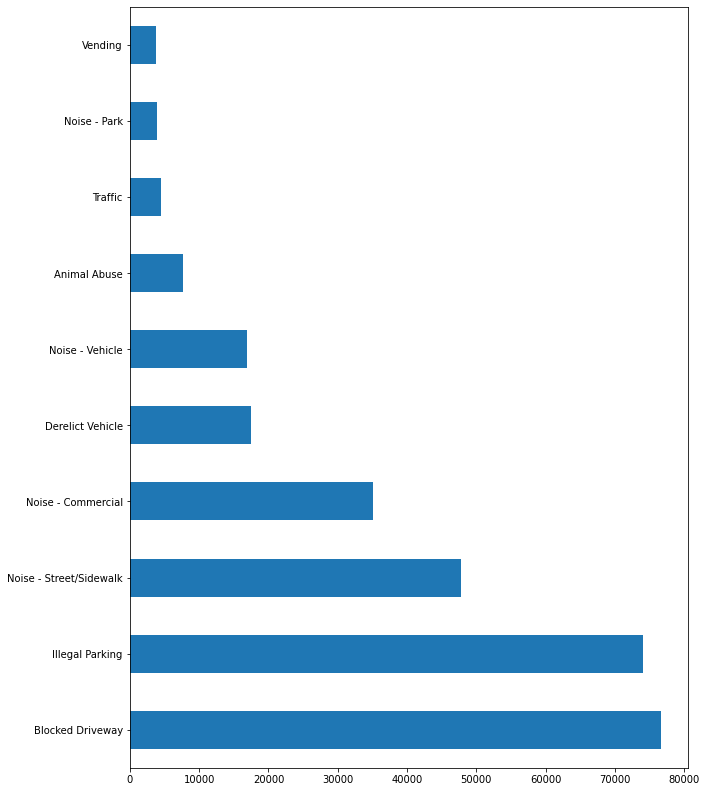

In [26]:
plt.figure(figsize=(10,14))
df_311['Complaint Type'].value_counts()[:10].plot.barh()


In [27]:
df_311_bloc=df_311[df_311['Complaint Type']=='Blocked Driveway']['Location Type'].reset_index()

In [28]:
df_311_bloc['Location Type'].value_counts()

Street/Sidewalk    76676
Name: Location Type, dtype: int64

##### Conclusion: As osbserved from the dataframe and graph, maximum complaints received on blocked driveway and illegal parking with blocked driveway the most. All complaints on blocked driveway were related to street/sidewalk.

##### b.Top 10 city from where most complaints received

<AxesSubplot:ylabel='City'>

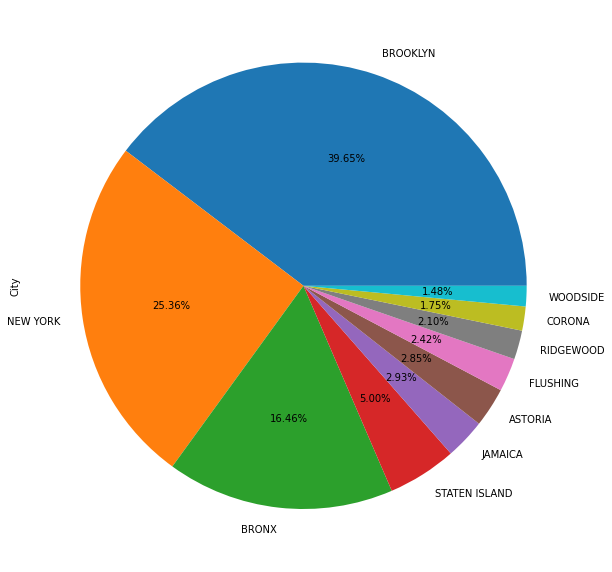

In [29]:
plt.figure(figsize=(10,15))
df_311['City'].value_counts()[:10].plot.pie(autopct="%0.2f%%")
#Pieplot outputs City in % with autopct set to 0.2f represent 2 decimal number

##### Conclusion: City Brooklyn raised more complaints than anyother city followed by Newyork city.

##### c. From top complaints of different types, finding the count received from different borough

In [30]:
comp_max = ['Blocked Driveway','Illegal Parking','Noise - Commercial','Noise - Street/Sidewalk','Derelict Vehicle','Animal Abuse']
comp_city = df_311.groupby(['Borough','Complaint Type']).size().unstack()
comp_city = comp_city[comp_max]
comp_city

Complaint Type,Blocked Driveway,Illegal Parking,Noise - Commercial,Noise - Street/Sidewalk,Derelict Vehicle,Animal Abuse
Borough,,,,,,
BRONX,12740,7829,2431,8864,1948,1411
BROOKLYN,28119,27386,11451,13315,5164,2390
MANHATTAN,2055,11981,14529,20360,530,1511
QUEENS,31621,21944,6057,4391,8102,1874
STATEN ISLAND,2141,4881,677,815,1762,557


Text(0.5, 1.0, 'Complaints from Borough')

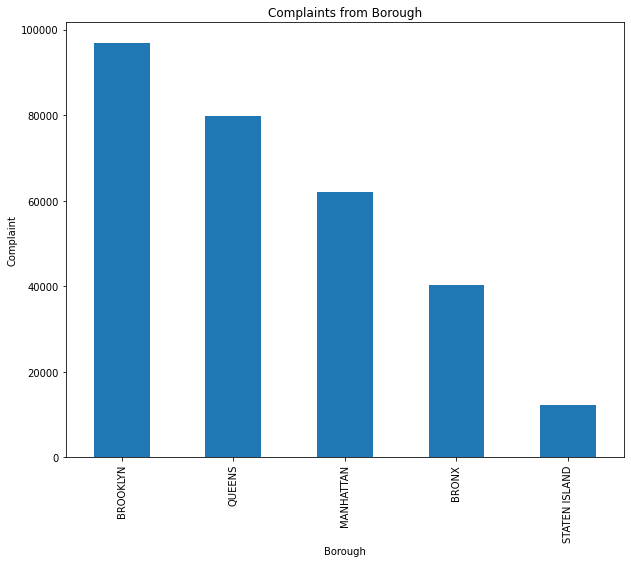

In [31]:
plt.figure(figsize=(10,8))
df_311['Borough'].value_counts()[:6].plot.bar()
plt.xlabel('Borough')
plt.ylabel('Complaint')
plt.title('Complaints from Borough')


##### Conclusion: As per observation by Borough, Brooklyn raised more complaints than anyother city followed by Queen and least my State Island

##### d. From data received, to find out request open and closed with complaint type.

In [32]:
df_311.groupby(['Location Type','Complaint Type']).size().unstack().fillna(0)[:10]

Complaint Type,Animal Abuse,Blocked Driveway,Derelict Vehicle,Disorderly Youth,Drinking,Graffiti,Illegal Parking,Noise - Commercial,Noise - House of Worship,Noise - Park,Noise - Street/Sidewalk,Noise - Vehicle,Posting Advertisement,Traffic,Vending
Location Type,,,,,,,,,,,,,,,
Club/Bar/Restaurant,0.0,0.0,0.0,0.0,365.0,0.0,0.0,16808.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Commercial,62.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Highway,0.0,0.0,13.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,184.0,0.0
House and Store,93.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
House of Worship,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,920.0,0.0,0.0,0.0,0.0,0.0,0.0
Park/Playground,120.0,0.0,0.0,0.0,96.0,0.0,0.0,0.0,0.0,3927.0,0.0,0.0,0.0,0.0,103.0
Parking Lot,109.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7.0,0.0,0.0
Residential Building,226.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
Residential Building/House,5075.0,0.0,0.0,77.0,289.0,56.0,0.0,0.0,0.0,0.0,0.0,0.0,54.0,0.0,201.0


In [33]:
df_311_Open['Status'].value_counts()

Closed      298471
Open          1439
Assigned       786
Draft            2
Name: Status, dtype: int64

In [34]:
df_311_Open['New_Status']=['Open' if x==('Open'or'Assigned' or 'Draft') else 'Closed' for x in df_311_Open['Status']]
df_311_Open['New_Status'].value_counts()

Closed    299259
Open        1439
Name: New_Status, dtype: int64

In [35]:
#Sorted complaints still open based on type
Comp_type_sts=df_311_Open.groupby(['Complaint Type','New_Status']).size().unstack()
Comp_type_sts=pd.DataFrame(Comp_type_sts['Open'].fillna(0).sort_values(ascending=False))
Comp_type_sts


,Open
Complaint Type,
Illegal Parking,589.0
Noise - Street/Sidewalk,342.0
Noise - Commercial,176.0
Blocked Driveway,152.0
Derelict Vehicle,106.0
Noise - Vehicle,31.0
Noise - Park,10.0
Animal Abuse,8.0
Vending,6.0


##### Conclusion: Maximum cases of illegal parking are open eventhough blocked driveway complaint received more.By this, NYPD is doing good job in unblocking driveway whereas they have to focus into open cases of illegal parking as well as Noise - Street/Sidewalk.

### 4 Order the complaint types based on the average ‘Request_Closing_Time’, grouping them for different locations.

In [36]:
#Grouping the columns by complaint type and location type to find average request closing time by considering aggregation method.
Avg_T=df_311.groupby(['Complaint Type','Location Type'])['Request_Closing_Time'].agg(['sum','count']).reset_index()
Avg_T['Avg_Req_Close_Time']=Avg_T['sum']/Avg_T['count']


In [37]:
df_comp_order=Avg_T.rename(columns={'sum':'Total_time','count':'Complaint_Count_Loc'})
df_comp_order

,Complaint Type,Location Type,Total_time,Complaint_Count_Loc,Avg_Req_Close_Time
0,Animal Abuse,Commercial,13 days 19:15:06,62,05:20:33.967741
1,Animal Abuse,House and Store,19 days 10:14:00,93,05:00:47.741935
2,Animal Abuse,Park/Playground,18 days 08:02:12,120,03:40:01.100000
3,Animal Abuse,Parking Lot,25 days 04:36:00,109,05:32:48.440366
4,Animal Abuse,Residential Building,45 days 10:41:31,226,04:49:33.853982
5,Animal Abuse,Residential Building/House,1140 days 06:36:34,5075,05:23:32.767290
6,Animal Abuse,Store/Commercial,92 days 17:24:58,520,04:16:46.726923
7,Animal Abuse,Street/Sidewalk,323 days 22:18:38,1516,05:07:41.423482
8,Animal Abuse,Subway Station,2 days 18:47:00,22,03:02:08.181818
9,Blocked Driveway,Street/Sidewalk,15136 days 20:44:55,76676,04:44:16.511750


In [38]:
df_comp_order[df_comp_order['Complaint Type']=='Vending']

,Complaint Type,Location Type,Total_time,Complaint_Count_Loc,Avg_Req_Close_Time
39,Vending,Park/Playground,14 days 21:53:19,103,03:28:28.728155
40,Vending,Residential Building/House,35 days 03:36:50,201,04:11:49.502487
41,Vending,Store/Commercial,71 days 12:41:53,432,03:58:25.817129
42,Vending,Street/Sidewalk,509 days 02:08:02,3037,04:01:23.135330


In [39]:
#Since many complaint received from same location there are duplicates , so location by cordinates will have less rows calculation average
df_311.duplicated(['Location']).value_counts()

True     167180
False    123925
dtype: int64

In [40]:
df_311_loc=df_311.groupby(['Location','Complaint Type','City'])['Request_Closing_Time'].agg({'sum','count'}).reset_index()
df_311_loc['Avg_Req_Close_Time']=df_311_loc['sum']/df_311_loc['count']
df_311_loc.rename(columns=({'Location':'Location_by_coordinates','count':'Complaint_count_loc','sum':'Total_Time_Cls'}),inplace=True)
df_311_loc.sort_values('Complaint Type',ascending=True)


,Location_by_coordinates,Complaint Type,City,Complaint_count_loc,Total_Time_Cls,Avg_Req_Close_Time
111216,"(40.772844017618496, -73.94783337202271)",Animal Abuse,NEW YORK,1,02:38:00,02:38:00
109632,"(40.76903689089537, -73.91521466252065)",Animal Abuse,ASTORIA,1,04:58:41,04:58:41
40942,"(40.669761708316564, -73.93660568292005)",Animal Abuse,BROOKLYN,1,03:38:05,03:38:05
65016,"(40.69948417076257, -73.9181341608447)",Animal Abuse,BROOKLYN,1,01:18:26,01:18:26
65019,"(40.69949132674228, -73.77943084483749)",Animal Abuse,JAMAICA,1,00:48:00,00:48:00
...,...,...,...,...,...,...
43021,"(40.67318266749815, -74.00260641636596)",Vending,BROOKLYN,1,00:36:38,00:36:38
108012,"(40.76602954830418, -73.99496040160967)",Vending,NEW YORK,1,00:26:00,00:26:00
69325,"(40.70579324370505, -74.00387005930732)",Vending,NEW YORK,1,00:09:00,00:09:00
107913,"(40.76588240978881, -73.97976223037516)",Vending,NEW YORK,1,06:00:00,06:00:00


In [41]:
df_311_loc.sort_values('Complaint Type',ascending=True)

,Location_by_coordinates,Complaint Type,City,Complaint_count_loc,Total_Time_Cls,Avg_Req_Close_Time
111216,"(40.772844017618496, -73.94783337202271)",Animal Abuse,NEW YORK,1,02:38:00,02:38:00
109632,"(40.76903689089537, -73.91521466252065)",Animal Abuse,ASTORIA,1,04:58:41,04:58:41
40942,"(40.669761708316564, -73.93660568292005)",Animal Abuse,BROOKLYN,1,03:38:05,03:38:05
65016,"(40.69948417076257, -73.9181341608447)",Animal Abuse,BROOKLYN,1,01:18:26,01:18:26
65019,"(40.69949132674228, -73.77943084483749)",Animal Abuse,JAMAICA,1,00:48:00,00:48:00
...,...,...,...,...,...,...
43021,"(40.67318266749815, -74.00260641636596)",Vending,BROOKLYN,1,00:36:38,00:36:38
108012,"(40.76602954830418, -73.99496040160967)",Vending,NEW YORK,1,00:26:00,00:26:00
69325,"(40.70579324370505, -74.00387005930732)",Vending,NEW YORK,1,00:09:00,00:09:00
107913,"(40.76588240978881, -73.97976223037516)",Vending,NEW YORK,1,06:00:00,06:00:00


### 5 Perform a statistical test for the following:Please note: For the below statements you need to state the Null and Alternate and then provide a statistical test to accept or reject #the Null Hypothesis along with the corresponding ‘p-value’.#Whether the average response time across complaint types is similar or not (overall) #Are the type of complaint or service requested and location related?

In [42]:
df_311['Request_Closing_Time'].value_counts()

00:36:00    480
00:51:00    463
00:44:00    462
00:32:00    455
00:46:00    453
           ... 
19:53:09      1
07:45:17      1
07:38:11      1
06:24:28      1
12:12:46      1
Name: Request_Closing_Time, Length: 47131, dtype: int64

In [43]:
#Convert time to minute format for all 
df_311['Req_Close_Min']= df_311['Request_Closing_Time'].astype('timedelta64[m]')+1
df_311[['Request_Closing_Time','Req_Close_Min']].head()

,Request_Closing_Time,Req_Close_Min
0,00:55:15,56.0
1,01:26:16,87.0
2,04:51:31,292.0
3,07:45:14,466.0
4,03:27:02,208.0


<AxesSubplot:>

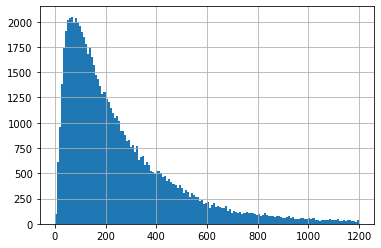

In [44]:
#consider complaint of blocked driveway
df_311_dist= df_311[df_311['Complaint Type']=='Blocked Driveway']['Req_Close_Min']
df_311_dist.hist(bins=150,range=(0,1200))
# we can see there is positive skewness and many outliers and we can limit to 1200

In [45]:
df_311_dist.describe()

count    76676.000000
mean       284.969039
std        334.324277
min          3.000000
25%         97.000000
50%        190.000000
75%        359.000000
max       8898.000000
Name: Req_Close_Min, dtype: float64

In [46]:
#to remove skewness will perform log transformation
df_comp_keys = {}
for x in df_311['Complaint Type'].unique():
    df_comp_keys[x] = np.log(df_311[df_311['Complaint Type']==x]['Req_Close_Min'])
df_comp_keys.keys()

dict_keys(['Noise - Street/Sidewalk', 'Blocked Driveway', 'Illegal Parking', 'Derelict Vehicle', 'Noise - Commercial', 'Noise - House of Worship', 'Posting Advertisement', 'Noise - Vehicle', 'Animal Abuse', 'Vending', 'Traffic', 'Drinking', 'Noise - Park', 'Graffiti', 'Disorderly Youth'])

<AxesSubplot:>

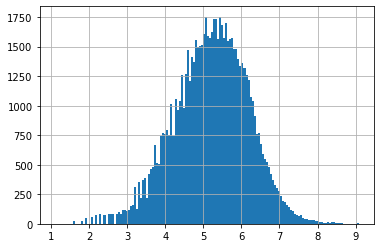

In [47]:
df_comp_keys['Blocked Driveway'].hist(bins=150)

In [48]:
Compl_std={}
for x in df_comp_keys.keys():
    Compl_std[x]=df_comp_keys[x].std()
df_1=Compl_std
df_1

{'Noise - Street/Sidewalk': 1.088306637145675,
 'Blocked Driveway': 0.9690316373869476,
 'Illegal Parking': 1.067144017372268,
 'Derelict Vehicle': 1.2472516029661278,
 'Noise - Commercial': 1.074052018094978,
 'Noise - House of Worship': 1.1601294447020027,
 'Posting Advertisement': 1.1947703475310807,
 'Noise - Vehicle': 1.0640723492297113,
 'Animal Abuse': 1.035709417470126,
 'Vending': 1.0995431178584425,
 'Traffic': 1.1703694713267516,
 'Drinking': 1.0362177868265494,
 'Noise - Park': 1.1061328713039125,
 'Graffiti': 1.0581967861803852,
 'Disorderly Youth': 1.026822302225286}

##### >After log transformation blocked drivway with request time is normally distributed with removal of skewness

##### scipy is library of python to perform scientific calculation, here we are going to use ANOVA test(analysis of variance). To perform ANOVA , standard deviation should be same and normal distribution of curve which is seen above

In [49]:
from scipy.stats import f_oneway

stat, p = f_oneway(df_comp_keys['Noise - Street/Sidewalk'],df_comp_keys['Blocked Driveway'],df_comp_keys['Illegal Parking'],
                   df_comp_keys['Derelict Vehicle'],
                   df_comp_keys['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))

Statistics=2455.209, p=0.000


#### 
Null Hypothesis: Average response time for all the complaints type is same.

Alternate Hypothesis: Average response time for all the complaints type is not same and theres is some difference among the groups.

Below We conduct ANOVA test for top 5 type of complaints
For a 95% of confidence interval we choose our alpha as 0.05 for 5%
Alpha(0.05) is the critical p-value, if our calculated p-value is less than alpha, it will give us strong evidence to reject Null Hypothesis.

if p < alpha(0.05) : Reject Null Hypothesis, Average response time for all the complaints type is not same.

if p > alpha(0.05) : Fail to reject Null Hypothesis, Average response time for all the complaints type is same.


In [50]:
# import f_oneway from scipy.stats library
from scipy.stats import f_oneway

stat, p = f_oneway(df_comp_keys['Noise - Street/Sidewalk'],df_comp_keys['Blocked Driveway'],df_comp_keys['Illegal Parking'],df_comp_keys['Derelict Vehicle'],
                   df_comp_keys['Noise - Commercial'])
print('Statistics=%.3f, p=%.3f' % (stat, p))
# interpret
alpha = 0.05
if p > alpha:
    print('Same distributions (fail to reject H0)')
else:
    print('Different distributions (reject H0)')

Statistics=2455.209, p=0.000
Different distributions (reject H0)


##### Are the type of complaint or service requested and location related?

In [51]:
#converting object to integer
s1 = df_311[['Longitude','Latitude']]
s_corr = df_311[['Complaint Type','Location Type','Borough','Longitude','Latitude','City']]

for x in s_corr:
    if x not in s1:
        s_corr[x]=s_corr[x].astype('category').cat.codes
s_corr.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 291105 entries, 0 to 300697
Data columns (total 6 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   Complaint Type  291105 non-null  int8   
 1   Location Type   291105 non-null  int8   
 2   Borough         291105 non-null  int8   
 3   Longitude       291105 non-null  float64
 4   Latitude        291105 non-null  float64
 5   City            291105 non-null  int8   
dtypes: float64(2), int8(4)
memory usage: 17.8 MB


In [52]:
s_corr.head()

,Complaint Type,Location Type,Borough,Longitude,Latitude,City
0,10,11,2,-73.923501,40.865682,29
1,1,11,3,-73.915094,40.775945,1
2,1,11,0,-73.888525,40.870325,5
3,6,11,0,-73.828379,40.835994,5
4,6,11,3,-73.874170,40.733060,12


In [53]:
s_corr.corr()

,Complaint Type,Location Type,Borough,Longitude,Latitude,City
Complaint Type,1.000000,-0.096244,-0.076875,-0.181780,0.170215,0.086666
Location Type,-0.096244,1.000000,-0.024143,0.069311,-0.027275,-0.043936
Borough,-0.076875,-0.024143,1.000000,0.022122,-0.250856,0.725402
Longitude,-0.181780,0.069311,0.022122,1.000000,0.368823,-0.119900
Latitude,0.170215,-0.027275,-0.250856,0.368823,1.000000,-0.015106
City,0.086666,-0.043936,0.725402,-0.119900,-0.015106,1.000000


##### Correlation ranges from -1 to +1, where -1 is strong negative correlation or inversely related, 1 as strong positive and 0 means there is no relation.
#### From above table,correlation value is near to zero and we can conclude there is no correlation between complaint type and Location.